# Algoritmo de Machine Learging: Clustering

In [1]:
# Paso 1: Importar Librerias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Paso 2: Cargar el dataset
df = pd.read_csv('https://raw.githubusercontent.com/adolfomaltez/InteligenciaArtificial/main/datasets/CC_GENERAL.csv')

In [3]:
# Paso 3: Preprocesar los datos
# Manejar valores faltantes
df.fillna(df.mean(), inplace=True)

# Seleccionar las características relevantes (excluyendo CustomerID)
X = df.drop(columns=['CUST_ID'])

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/tmp/ipykernel_121544/1480569790.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


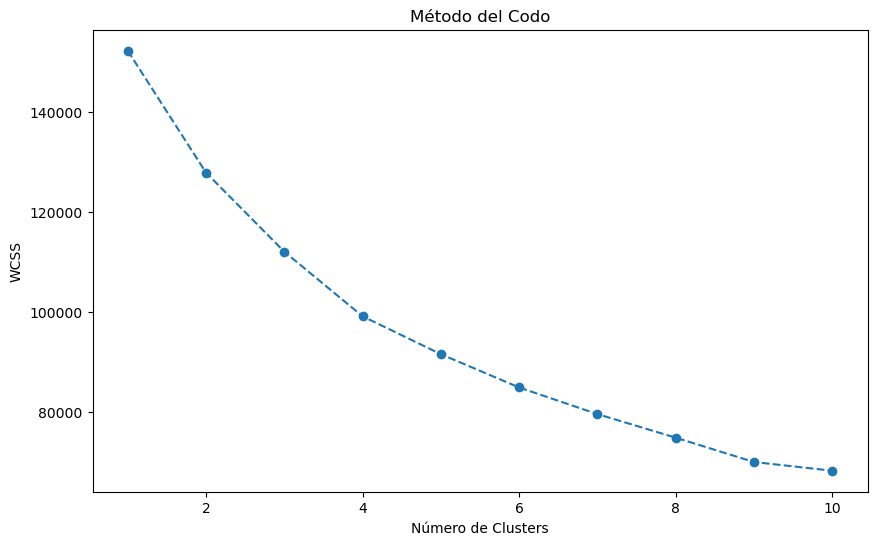

In [4]:
# Paso 4: Determinar el numero optimo de clusters
# Método del codo para determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método del Codo')
plt.show()

In [5]:
# Paso 5: Entrenar el modelo de K-Means
# Entrenar el modelo de K-Means con 5 clusters (suponiendo que el método del codo sugiere 5 clusters)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Añadir las etiquetas de cluster al DataFrame original
df['Cluster'] = y_kmeans

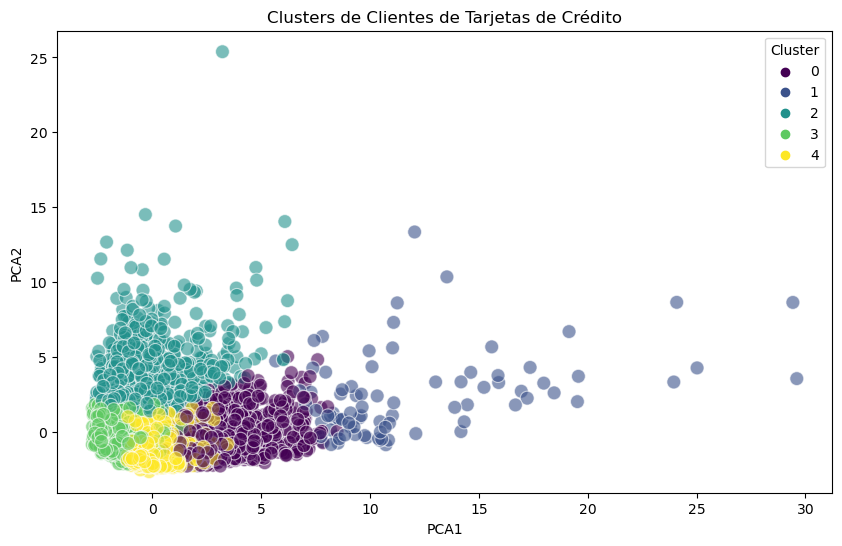

In [6]:
# Paso 6: Visualizar los clusters
# Usar PCA para reducir la dimensionalidad a 2D para la visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los datos reducidos
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = y_kmeans

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Clusters de Clientes de Tarjetas de Crédito')
plt.show()